In [1]:
%matplotlib inline
import numpy as np
import subprocess
import matplotlib.pyplot as plt

In [2]:
def get_SNR(file):
    with open(file, "rt")as f:
        a = f.readlines()
    lst = []
    for x in a:
        if "Value:" in x:
            lst.append(float(x.split("Value: ")[1]))
        #print(x.split("bla"))
    lst = lst[len(lst)//2 : ]
    return (np.array(lst).mean(), np.array(lst).std())

In [3]:
def step1(file):
    with open(file, "rb")as f:
        _ = f.read()
    
    rcv = np.frombuffer(_, dtype = np.uint8)
    match = np.array([0, 0, 178, 62, 71, 168, 187, 253, 16, 38, 149, 55, 226, 170, 26], dtype = np.uint8)
    match_extended = np.tile(match, int(rcv.shape[0]/len(match)))
    
    idx = np.argmax([np.mean(np.equal(np.packbits(np.roll(np.unpackbits(rcv), i)), match_extended)) for i in range(15 * 8)])
    
    to_write = np.packbits(np.roll(np.unpackbits(rcv), idx))
    
    with open("output2.data", "wb") as f:
        f.write(to_write)

In [4]:
def step2():
    process=subprocess.Popen(["python2", "BCH_Recoder.py"],
                             stdin=subprocess.PIPE,
                             stdout=subprocess.PIPE,
                             stderr=subprocess.PIPE)


    #time.sleep(10)

    # while os.stat("output.data").st_size < os.stat("orig_pinguim.bmp").st_size * 2:
    #     pass

    inputdata= b" "
    stdoutdata,stderrdata=process.communicate(input=inputdata)
    
    return

In [5]:
def step3(file):
    with open(file, "rb")as f:
        _ = f.read()
    
    final = np.frombuffer(_, dtype = np.uint8)
    
    tx = np.array([0, 255, 40, 250, 37, 42, 186], dtype = np.uint8)
    match_extended_final = np.tile(tx, int(final.shape[0]/len(tx)))
    
    return (1 - np.mean(np.equal(np.unpackbits(final), np.unpackbits(match_extended_final))))

Gerar top_block.py no gnuradio, depois no terminal: python2 top_block.py -> output.txt

In [161]:
%%time
step1("output.data")

CPU times: user 2.09 s, sys: 1.63 s, total: 3.72 s
Wall time: 3.77 s


In [162]:
%%time
step2()

CPU times: user 4.1 ms, sys: 4.06 ms, total: 8.16 ms
Wall time: 8.32 s


In [163]:
%%time
step3("output3.data")

CPU times: user 18.6 ms, sys: 13.4 ms, total: 32 ms
Wall time: 32.1 ms


0.00012205357142858198

In [164]:
get_SNR("output.txt"), step3("output3.data")

((6.4866798905608745, 0.3070860797276639), 0.00012205357142858198)

## <font color = red> Quanto mais baixo o SNR, maior a chance de ocorrer problemas na recepção, mais chance do resultado obtido ser ruim
    
# <font color = blue> Resultados obtidos simulados
  <font color = blue> SNR Média, SNR STD, BER

     
      

((6.431067191780822, 0.22504306409420496), 0.00010883928571425727) -> 2nd and 4th

((5.718607230095759, 1.1661024738189016), 0.0001303571428571404) -> Skew


In [2]:
a = """
((11.87596506849315, 0.27409708998581855), 0.0)

((10.632518561643836, 0.5444092597158589), 0.0)

((9.643535136986301, 0.3791730134233486), 0.0)

((7.445212465753424, 0.3496959348609927), 7.767857142848555e-06)

((7.067593767123286, 0.2606505527249247), 3.607142857142698e-05)

((5.600923698630137, 0.3705099114197793), 0.0007822321428571088)

((3.955382602739726, 0.39780842285182433), 0.01158276785714285)

((3.628972671232876, 0.389460811463942), 0.01671410714285715)

((3.1698814383561644, 0.47569910301387486), 0.030747589285714305)

((6.431067191780822, 0.22504306409420496), 0.00010883928571425727)

((5.718607230095759, 1.1661024738189016), 0.0001303571428571404)

((6.4866798905608745, 0.3070860797276639), 0.00012205357142858198)

"""

In [3]:
snr_avgs = []
snr_stds = []
bers = []

for line in a.splitlines():
    aux = line.replace("(", "").replace(")", "").split(",")
    if aux != [""]:
        snr_avgs.append(float(aux[0]))
        snr_stds.append(float(aux[1]))
        bers.append(float(aux[2]))

In [4]:
import math

In [5]:
10*math.log10(15/7)

3.3099321904142442

In [6]:
EbN0_min = 0
EbN0_max = 10
EbN0_range = range(EbN0_min, EbN0_max+1)

In [7]:
simu = np.load("ber_simu.npy")

In [8]:
theory = np.load("ber_theory.npy")

In [9]:
theory

array([1.44927687e-01, 1.06228588e-01, 7.21988374e-02, 4.47099721e-02,
       2.46890952e-02, 1.18368372e-02, 4.76517370e-03, 1.54415558e-03,
       3.81742657e-04, 6.72521953e-05, 7.74418644e-06])

In [10]:
simu

array([3.29221926e-01, 2.76622360e-01, 2.16220862e-01, 1.52144629e-01,
       9.42288978e-02, 4.92150989e-02, 2.08547995e-02, 6.86993316e-03,
       1.67249996e-03, 2.74699992e-04, 2.49999991e-05])

In [11]:
np.array(snr_avgs) + 10*math.log10(15/7)

array([15.18589726, 13.94245075, 12.95346733, 10.75514466, 10.37752596,
        8.91085589,  7.26531479,  6.93890486,  6.47981363,  9.74099938,
        9.02853942,  9.79661208])

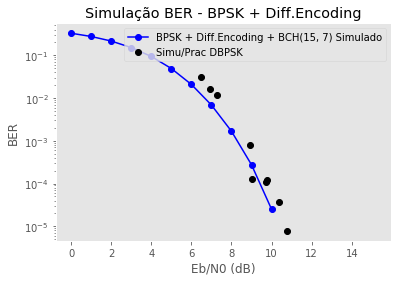

In [20]:
plt.style.use('ggplot')
#plt.semilogy(EbN0_range, theory, "g-.", label = "BPSK + Diff.Encoding Teórico")
plt.semilogy(EbN0_range, simu, "b-o", label = "BPSK + Diff.Encoding + BCH(15, 7) Simulado")
plt.semilogy(np.array(snr_avgs) + 10*math.log10(15/7), bers, "o", color = "black", label = "Simu/Prac DBPSK")
plt.legend()
plt.grid()

plt.title('Simulação BER - BPSK + Diff.Encoding')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('BER')
plt.savefig("Curva.png")